# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

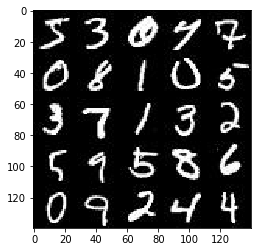

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

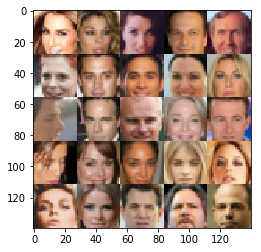

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/jon/anaconda/envs/tea-py3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [94]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        ## Layer 1
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(inputs=images, filters=64, kernel_size=5, strides=2, padding="same")
        # Leak Relu
        x1 = tf.maximum(alpha*x1, x1)
        print("D_x1.shape:", x1.shape)
        # 14x14x64
        
        ## Layer 2
        x2 = tf.layers.conv2d(inputs=x1, filters=128, kernel_size=5, strides=2, padding="same")
        # Batch Normalize
        x2 = tf.layers.batch_normalization(x2, training=True)
        # Leak Relu
        x2 = tf.maximum(alpha*x2, x2)
        print("D_x2.shape:", x2.shape)
        # 7x7x128
        
#         ## Layer 3 
#         x3 = tf.layers.conv2d(inputs=x1, filters=256, kernel_size=5, strides=2, padding="same")
#         # Batch Normalize
#         x3 = tf.layers.batch_normalization(x3, training=True)
#         # Leak Relu
#         x3 = tf.maximum(alpha*x3, x3)
#         # 4x4x512
        
        # Fully connected layer
        x3 = tf.reshape(x2, (-1, 7*7*128))
        logits = tf.layers.dense(inputs=x3, units=1, activation=None)
        out = tf.sigmoid(logits)
        print("D_out.shape:", out.shape)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [95]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse=not is_train):
        ## Layer 1
        # First fully connected layer
        x1 = tf.layers.dense(inputs=z, units=7*7*128, activation=None)
        x1 = tf.reshape(x1,(-1,7,7,128))
        # Batch Normalize
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        # Leak Relu
        x1 = tf.maximum(alpha*x1, x1)
        print("G_x1.shape:", x1.shape)
        
        ## Layer 2
        x2 = tf.layers.conv2d_transpose(inputs=x1, filters=64, kernel_size=5, strides=2, padding="same")
        # Batch Normalize
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        # Leak Relu
        x2 = tf.maximum(alpha*x2, x2)
        print("G_x2.shape:", x2.shape)
        
#         ## Layer 3
#         x3 = tf.layers.conv2d_transpose(inputs=x2, filters=64, kernel_size=5, strides=2, padding="same")
#         # Batch Normalize
#         x3 = tf.layers.batch_normalization(x3, training=is_train)
#         # Leak Relu
#         x3 = tf.maximum(alpha*x3, x3)
#         print("x3.shape:", x3.shape)
        
        # Output layer, 28x28x3
        logits = tf.layers.conv2d_transpose(inputs=x2, filters=out_channel_dim, kernel_size=5, strides=2, padding="same")
        
        out = tf.tanh(logits)
        print("G_out.shape:", out.shape)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 5)
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [96]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 4)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [97]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [98]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [104]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    data_count = data_shape[0]
    real_size = data_shape[1:]
    
    # Build network
    image_width = real_size[0]
    image_height = real_size[1]
    image_channels = real_size[2]
        
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    print_every=20
    show_every=100
    samples, losses = [], []
    out_channel_dim = 3 if data_image_mode == 'RGB' else 1
    
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            # Batch number
            b = 0
            for batch_images in get_batches(batch_size):
                b += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                                   input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, 
                                                   input_z: batch_z, lr: learning_rate})
                
                # Print batch loss
                if b % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    batches = int(data_count/batch_size)
                    
                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Batch {}/{}...".format(b+1, batches),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                # Show image
                if b % show_every == 0:
                    show_generator_output(sess, 5, input_z, out_channel_dim, data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')
          

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1) L
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
Epoch 1/2... Batch 21/937... Discriminator Loss: 0.6389... Generator Loss: 1.0696
Epoch 1/2... Batch 41/937... Discriminator Loss: 0.7214... Generator Loss: 1.3540
Epoch 1/2... Batch 61/937... Discriminator Loss: 0.4719... Generator Loss: 1.5443
Epoch 1/2... Batch 81/937... Discriminator Loss: 0.5828... Generator Loss: 1.4256
Epoch 1/2... Batch 101/937... Discriminator Loss: 0.7033... Generator Loss: 1.3235
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


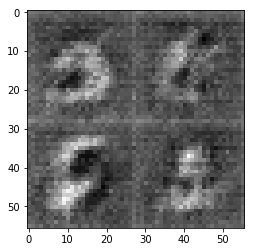

Epoch 1/2... Batch 121/937... Discriminator Loss: 0.6843... Generator Loss: 1.6756
Epoch 1/2... Batch 141/937... Discriminator Loss: 0.5304... Generator Loss: 1.4679
Epoch 1/2... Batch 161/937... Discriminator Loss: 0.5618... Generator Loss: 1.2410
Epoch 1/2... Batch 181/937... Discriminator Loss: 0.4713... Generator Loss: 1.4911
Epoch 1/2... Batch 201/937... Discriminator Loss: 0.5553... Generator Loss: 1.0640
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


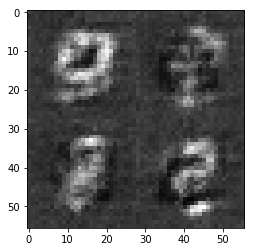

Epoch 1/2... Batch 221/937... Discriminator Loss: 0.5174... Generator Loss: 1.9268
Epoch 1/2... Batch 241/937... Discriminator Loss: 0.6504... Generator Loss: 0.9314
Epoch 1/2... Batch 261/937... Discriminator Loss: 0.3408... Generator Loss: 1.7401
Epoch 1/2... Batch 281/937... Discriminator Loss: 0.3309... Generator Loss: 1.7687
Epoch 1/2... Batch 301/937... Discriminator Loss: 0.4266... Generator Loss: 1.9970
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


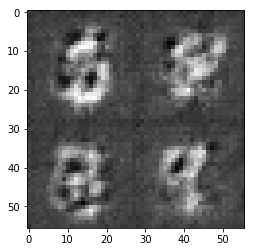

Epoch 1/2... Batch 321/937... Discriminator Loss: 0.4039... Generator Loss: 1.7771
Epoch 1/2... Batch 341/937... Discriminator Loss: 0.3088... Generator Loss: 2.4261
Epoch 1/2... Batch 361/937... Discriminator Loss: 0.3832... Generator Loss: 2.0268
Epoch 1/2... Batch 381/937... Discriminator Loss: 0.2726... Generator Loss: 2.1313
Epoch 1/2... Batch 401/937... Discriminator Loss: 0.3229... Generator Loss: 2.1040
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


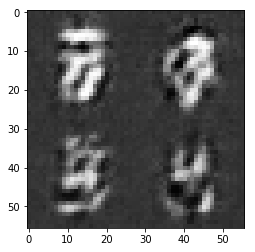

Epoch 1/2... Batch 421/937... Discriminator Loss: 0.3334... Generator Loss: 2.6754
Epoch 1/2... Batch 441/937... Discriminator Loss: 0.2655... Generator Loss: 2.6344
Epoch 1/2... Batch 461/937... Discriminator Loss: 0.2295... Generator Loss: 2.3436
Epoch 1/2... Batch 481/937... Discriminator Loss: 0.2208... Generator Loss: 2.3295
Epoch 1/2... Batch 501/937... Discriminator Loss: 0.2395... Generator Loss: 2.3801
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


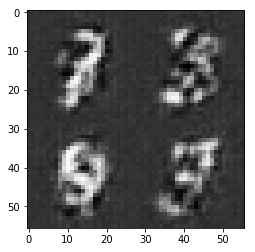

Epoch 1/2... Batch 521/937... Discriminator Loss: 0.2824... Generator Loss: 1.9927
Epoch 1/2... Batch 541/937... Discriminator Loss: 0.2175... Generator Loss: 2.1249
Epoch 1/2... Batch 561/937... Discriminator Loss: 0.8511... Generator Loss: 0.7081
Epoch 1/2... Batch 581/937... Discriminator Loss: 0.2088... Generator Loss: 2.5559
Epoch 1/2... Batch 601/937... Discriminator Loss: 0.2017... Generator Loss: 2.9657
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


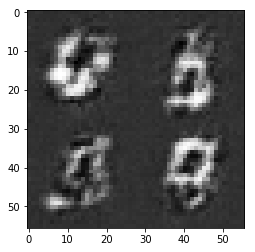

Epoch 1/2... Batch 621/937... Discriminator Loss: 0.1914... Generator Loss: 2.2951
Epoch 1/2... Batch 641/937... Discriminator Loss: 0.1545... Generator Loss: 2.5951
Epoch 1/2... Batch 661/937... Discriminator Loss: 0.2182... Generator Loss: 2.3255
Epoch 1/2... Batch 681/937... Discriminator Loss: 0.3290... Generator Loss: 1.5197
Epoch 1/2... Batch 701/937... Discriminator Loss: 0.1735... Generator Loss: 2.7499
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


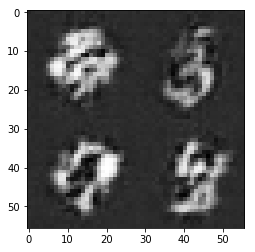

Epoch 1/2... Batch 721/937... Discriminator Loss: 0.1652... Generator Loss: 2.6423
Epoch 1/2... Batch 741/937... Discriminator Loss: 0.1500... Generator Loss: 2.5810
Epoch 1/2... Batch 761/937... Discriminator Loss: 0.1527... Generator Loss: 2.7163
Epoch 1/2... Batch 781/937... Discriminator Loss: 0.3048... Generator Loss: 1.7276
Epoch 1/2... Batch 801/937... Discriminator Loss: 0.1893... Generator Loss: 2.7375
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


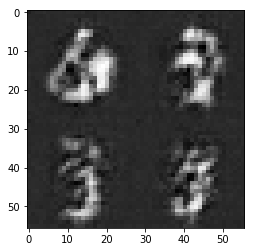

Epoch 1/2... Batch 821/937... Discriminator Loss: 0.1575... Generator Loss: 2.7040
Epoch 1/2... Batch 841/937... Discriminator Loss: 0.3118... Generator Loss: 4.2856
Epoch 1/2... Batch 861/937... Discriminator Loss: 0.1211... Generator Loss: 2.8784
Epoch 1/2... Batch 881/937... Discriminator Loss: 0.1648... Generator Loss: 2.5086
Epoch 1/2... Batch 901/937... Discriminator Loss: 0.1302... Generator Loss: 3.2587
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


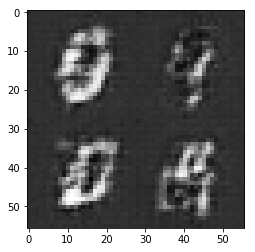

Epoch 1/2... Batch 921/937... Discriminator Loss: 0.2248... Generator Loss: 2.2384
Epoch 2/2... Batch 21/937... Discriminator Loss: 0.1643... Generator Loss: 2.6854
Epoch 2/2... Batch 41/937... Discriminator Loss: 0.1139... Generator Loss: 2.9291
Epoch 2/2... Batch 61/937... Discriminator Loss: 0.1280... Generator Loss: 2.9865
Epoch 2/2... Batch 81/937... Discriminator Loss: 0.1016... Generator Loss: 3.0946
Epoch 2/2... Batch 101/937... Discriminator Loss: 0.1336... Generator Loss: 2.9373
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


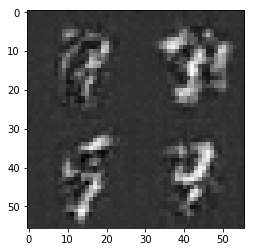

Epoch 2/2... Batch 121/937... Discriminator Loss: 0.1063... Generator Loss: 2.9792
Epoch 2/2... Batch 141/937... Discriminator Loss: 0.1014... Generator Loss: 3.3391
Epoch 2/2... Batch 161/937... Discriminator Loss: 0.0854... Generator Loss: 3.4187
Epoch 2/2... Batch 181/937... Discriminator Loss: 0.1154... Generator Loss: 3.6871
Epoch 2/2... Batch 201/937... Discriminator Loss: 0.0921... Generator Loss: 3.1166
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


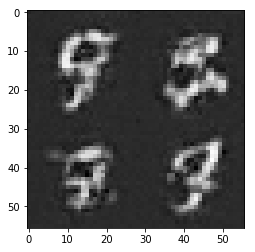

Epoch 2/2... Batch 221/937... Discriminator Loss: 0.1204... Generator Loss: 2.9655
Epoch 2/2... Batch 241/937... Discriminator Loss: 0.0833... Generator Loss: 3.8345
Epoch 2/2... Batch 261/937... Discriminator Loss: 0.1059... Generator Loss: 3.3608
Epoch 2/2... Batch 281/937... Discriminator Loss: 0.0945... Generator Loss: 3.4025
Epoch 2/2... Batch 301/937... Discriminator Loss: 0.0773... Generator Loss: 3.3804
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


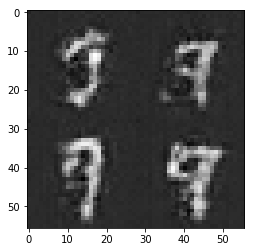

Epoch 2/2... Batch 321/937... Discriminator Loss: 0.1029... Generator Loss: 3.5522
Epoch 2/2... Batch 341/937... Discriminator Loss: 0.8911... Generator Loss: 0.6780
Epoch 2/2... Batch 361/937... Discriminator Loss: 0.1634... Generator Loss: 3.3748
Epoch 2/2... Batch 381/937... Discriminator Loss: 0.1002... Generator Loss: 3.2115
Epoch 2/2... Batch 401/937... Discriminator Loss: 0.0703... Generator Loss: 3.8502
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


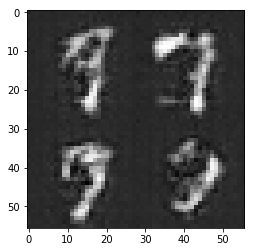

Epoch 2/2... Batch 421/937... Discriminator Loss: 0.0733... Generator Loss: 3.4631
Epoch 2/2... Batch 441/937... Discriminator Loss: 0.0922... Generator Loss: 3.2781
Epoch 2/2... Batch 461/937... Discriminator Loss: 0.0789... Generator Loss: 3.3666
Epoch 2/2... Batch 481/937... Discriminator Loss: 0.0812... Generator Loss: 3.3019
Epoch 2/2... Batch 501/937... Discriminator Loss: 0.1896... Generator Loss: 2.2822
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


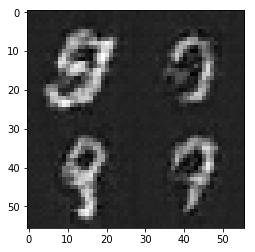

Epoch 2/2... Batch 521/937... Discriminator Loss: 0.1573... Generator Loss: 2.3690
Epoch 2/2... Batch 541/937... Discriminator Loss: 0.1138... Generator Loss: 3.0025
Epoch 2/2... Batch 561/937... Discriminator Loss: 0.1262... Generator Loss: 3.3470
Epoch 2/2... Batch 581/937... Discriminator Loss: 0.1416... Generator Loss: 2.8001
Epoch 2/2... Batch 601/937... Discriminator Loss: 0.1057... Generator Loss: 3.2450
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


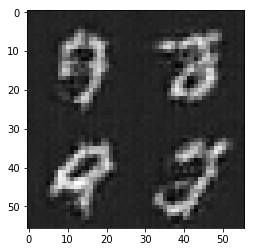

Epoch 2/2... Batch 621/937... Discriminator Loss: 0.1196... Generator Loss: 3.1129
Epoch 2/2... Batch 641/937... Discriminator Loss: 0.4748... Generator Loss: 5.0646
Epoch 2/2... Batch 661/937... Discriminator Loss: 0.1373... Generator Loss: 3.5267
Epoch 2/2... Batch 681/937... Discriminator Loss: 0.2491... Generator Loss: 2.0351
Epoch 2/2... Batch 701/937... Discriminator Loss: 0.1044... Generator Loss: 3.2952
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


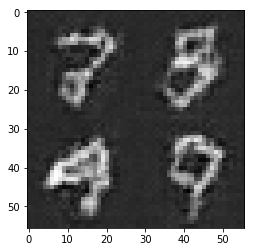

Epoch 2/2... Batch 721/937... Discriminator Loss: 0.1633... Generator Loss: 2.5817
Epoch 2/2... Batch 741/937... Discriminator Loss: 0.0940... Generator Loss: 3.5694
Epoch 2/2... Batch 761/937... Discriminator Loss: 0.1440... Generator Loss: 2.8610
Epoch 2/2... Batch 781/937... Discriminator Loss: 0.2778... Generator Loss: 1.9815
Epoch 2/2... Batch 801/937... Discriminator Loss: 0.1818... Generator Loss: 2.3398
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


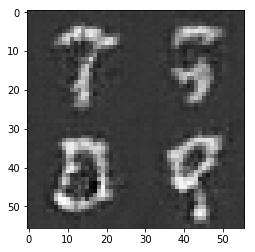

Epoch 2/2... Batch 821/937... Discriminator Loss: 0.1453... Generator Loss: 2.9058
Epoch 2/2... Batch 841/937... Discriminator Loss: 0.1788... Generator Loss: 3.8604
Epoch 2/2... Batch 861/937... Discriminator Loss: 0.1328... Generator Loss: 3.2461
Epoch 2/2... Batch 881/937... Discriminator Loss: 0.2577... Generator Loss: 1.8777
Epoch 2/2... Batch 901/937... Discriminator Loss: 0.1177... Generator Loss: 3.1648
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 1)


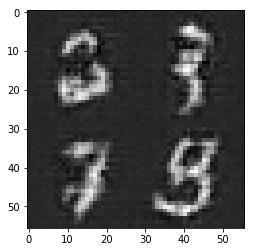

Epoch 2/2... Batch 921/937... Discriminator Loss: 0.1474... Generator Loss: 2.5426


In [105]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2
print(mnist_dataset.shape, mnist_dataset.image_mode)
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
D_x1.shape: (?, 14, 14, 64)
D_x2.shape: (?, 7, 7, 128)
D_out.shape: (?, 1)
Epoch 1/1... Batch 21/3165... Discriminator Loss: 0.5735... Generator Loss: 1.4444
Epoch 1/1... Batch 41/3165... Discriminator Loss: 0.3931... Generator Loss: 1.5727
Epoch 1/1... Batch 61/3165... Discriminator Loss: 0.3379... Generator Loss: 1.9888
Epoch 1/1... Batch 81/3165... Discriminator Loss: 0.2381... Generator Loss: 2.4273
Epoch 1/1... Batch 101/3165... Discriminator Loss: 0.2901... Generator Loss: 1.7416
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


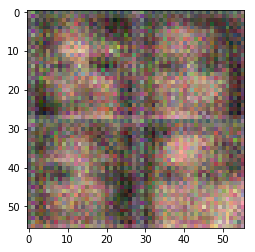

Epoch 1/1... Batch 121/3165... Discriminator Loss: 0.2030... Generator Loss: 2.1569
Epoch 1/1... Batch 141/3165... Discriminator Loss: 0.4444... Generator Loss: 1.2592
Epoch 1/1... Batch 161/3165... Discriminator Loss: 0.4538... Generator Loss: 1.3453
Epoch 1/1... Batch 181/3165... Discriminator Loss: 0.9927... Generator Loss: 0.5413
Epoch 1/1... Batch 201/3165... Discriminator Loss: 0.6446... Generator Loss: 0.9150
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


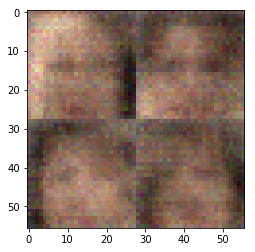

Epoch 1/1... Batch 221/3165... Discriminator Loss: 0.2970... Generator Loss: 2.1994
Epoch 1/1... Batch 241/3165... Discriminator Loss: 0.3451... Generator Loss: 1.9229
Epoch 1/1... Batch 261/3165... Discriminator Loss: 0.4080... Generator Loss: 1.9715
Epoch 1/1... Batch 281/3165... Discriminator Loss: 0.6691... Generator Loss: 1.2038
Epoch 1/1... Batch 301/3165... Discriminator Loss: 0.7000... Generator Loss: 2.2561
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


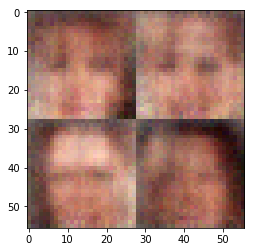

Epoch 1/1... Batch 321/3165... Discriminator Loss: 0.7864... Generator Loss: 1.6248
Epoch 1/1... Batch 341/3165... Discriminator Loss: 0.7389... Generator Loss: 1.2306
Epoch 1/1... Batch 361/3165... Discriminator Loss: 0.5916... Generator Loss: 1.3420
Epoch 1/1... Batch 381/3165... Discriminator Loss: 1.0726... Generator Loss: 0.6397
Epoch 1/1... Batch 401/3165... Discriminator Loss: 0.7422... Generator Loss: 1.2580
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


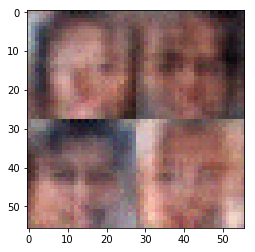

Epoch 1/1... Batch 421/3165... Discriminator Loss: 0.8034... Generator Loss: 1.3576
Epoch 1/1... Batch 441/3165... Discriminator Loss: 0.7293... Generator Loss: 1.3508
Epoch 1/1... Batch 461/3165... Discriminator Loss: 1.1164... Generator Loss: 0.6616
Epoch 1/1... Batch 481/3165... Discriminator Loss: 0.7455... Generator Loss: 1.6442
Epoch 1/1... Batch 501/3165... Discriminator Loss: 0.9739... Generator Loss: 1.8953
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


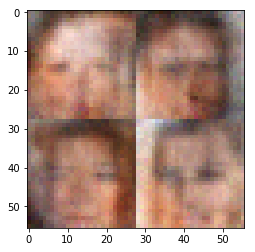

Epoch 1/1... Batch 521/3165... Discriminator Loss: 1.0636... Generator Loss: 0.7378
Epoch 1/1... Batch 541/3165... Discriminator Loss: 0.9066... Generator Loss: 0.7499
Epoch 1/1... Batch 561/3165... Discriminator Loss: 0.5777... Generator Loss: 1.3971
Epoch 1/1... Batch 581/3165... Discriminator Loss: 0.8765... Generator Loss: 2.2524
Epoch 1/1... Batch 601/3165... Discriminator Loss: 0.9129... Generator Loss: 2.5955
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


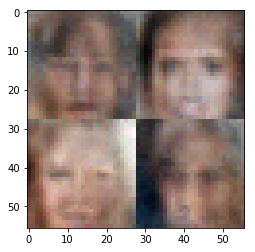

Epoch 1/1... Batch 621/3165... Discriminator Loss: 0.6790... Generator Loss: 1.5675
Epoch 1/1... Batch 641/3165... Discriminator Loss: 0.9457... Generator Loss: 0.6916
Epoch 1/1... Batch 661/3165... Discriminator Loss: 0.8262... Generator Loss: 1.1928
Epoch 1/1... Batch 681/3165... Discriminator Loss: 0.3552... Generator Loss: 1.8927
Epoch 1/1... Batch 701/3165... Discriminator Loss: 0.3714... Generator Loss: 3.2279
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


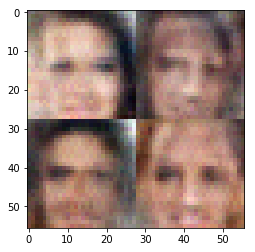

Epoch 1/1... Batch 721/3165... Discriminator Loss: 0.6164... Generator Loss: 1.7634
Epoch 1/1... Batch 741/3165... Discriminator Loss: 0.4378... Generator Loss: 2.7008
Epoch 1/1... Batch 761/3165... Discriminator Loss: 1.4308... Generator Loss: 0.3802
Epoch 1/1... Batch 781/3165... Discriminator Loss: 1.5326... Generator Loss: 0.4071
Epoch 1/1... Batch 801/3165... Discriminator Loss: 1.0366... Generator Loss: 0.6664
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


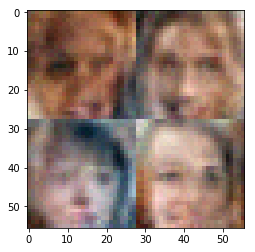

Epoch 1/1... Batch 821/3165... Discriminator Loss: 0.1862... Generator Loss: 2.8219
Epoch 1/1... Batch 841/3165... Discriminator Loss: 0.9965... Generator Loss: 0.8713
Epoch 1/1... Batch 861/3165... Discriminator Loss: 0.3741... Generator Loss: 2.2186
Epoch 1/1... Batch 881/3165... Discriminator Loss: 0.2520... Generator Loss: 2.7115
Epoch 1/1... Batch 901/3165... Discriminator Loss: 0.6138... Generator Loss: 1.1081
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


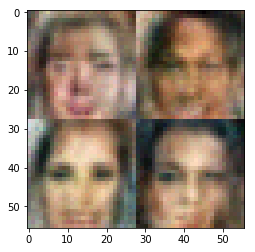

Epoch 1/1... Batch 921/3165... Discriminator Loss: 1.3676... Generator Loss: 0.4179
Epoch 1/1... Batch 941/3165... Discriminator Loss: 0.5952... Generator Loss: 1.1176
Epoch 1/1... Batch 961/3165... Discriminator Loss: 0.5735... Generator Loss: 1.5657
Epoch 1/1... Batch 981/3165... Discriminator Loss: 0.3888... Generator Loss: 1.6134
Epoch 1/1... Batch 1001/3165... Discriminator Loss: 0.4531... Generator Loss: 2.2051
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


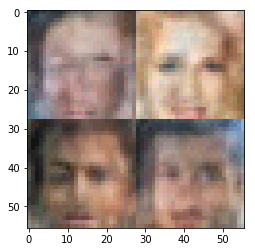

Epoch 1/1... Batch 1021/3165... Discriminator Loss: 1.0209... Generator Loss: 0.7474
Epoch 1/1... Batch 1041/3165... Discriminator Loss: 1.0342... Generator Loss: 0.6980
Epoch 1/1... Batch 1061/3165... Discriminator Loss: 0.5031... Generator Loss: 1.7204
Epoch 1/1... Batch 1081/3165... Discriminator Loss: 0.6602... Generator Loss: 3.2944
Epoch 1/1... Batch 1101/3165... Discriminator Loss: 0.4274... Generator Loss: 2.3246
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


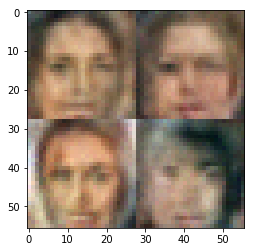

Epoch 1/1... Batch 1121/3165... Discriminator Loss: 0.2278... Generator Loss: 2.3223
Epoch 1/1... Batch 1141/3165... Discriminator Loss: 0.9744... Generator Loss: 0.6640
Epoch 1/1... Batch 1161/3165... Discriminator Loss: 0.4952... Generator Loss: 1.9217
Epoch 1/1... Batch 1181/3165... Discriminator Loss: 0.4110... Generator Loss: 1.8315
Epoch 1/1... Batch 1201/3165... Discriminator Loss: 0.3674... Generator Loss: 2.5377
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


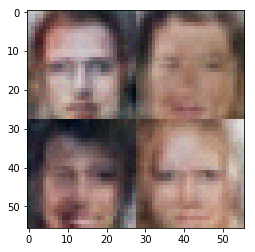

Epoch 1/1... Batch 1221/3165... Discriminator Loss: 0.2645... Generator Loss: 3.9672
Epoch 1/1... Batch 1241/3165... Discriminator Loss: 0.5236... Generator Loss: 4.5404
Epoch 1/1... Batch 1261/3165... Discriminator Loss: 2.1325... Generator Loss: 0.2122
Epoch 1/1... Batch 1281/3165... Discriminator Loss: 0.9829... Generator Loss: 0.6642
Epoch 1/1... Batch 1301/3165... Discriminator Loss: 1.1511... Generator Loss: 0.5211
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


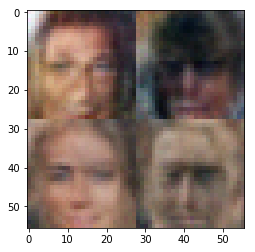

Epoch 1/1... Batch 1321/3165... Discriminator Loss: 0.7961... Generator Loss: 0.8634
Epoch 1/1... Batch 1341/3165... Discriminator Loss: 1.4966... Generator Loss: 0.3294
Epoch 1/1... Batch 1361/3165... Discriminator Loss: 0.9387... Generator Loss: 0.7086
Epoch 1/1... Batch 1381/3165... Discriminator Loss: 0.5050... Generator Loss: 1.2969
Epoch 1/1... Batch 1401/3165... Discriminator Loss: 0.8417... Generator Loss: 0.7253
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


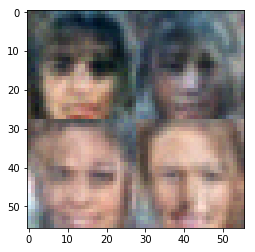

Epoch 1/1... Batch 1421/3165... Discriminator Loss: 0.4769... Generator Loss: 1.4043
Epoch 1/1... Batch 1441/3165... Discriminator Loss: 0.2793... Generator Loss: 4.6228
Epoch 1/1... Batch 1461/3165... Discriminator Loss: 0.5323... Generator Loss: 4.4148
Epoch 1/1... Batch 1481/3165... Discriminator Loss: 1.0822... Generator Loss: 1.3927
Epoch 1/1... Batch 1501/3165... Discriminator Loss: 0.1859... Generator Loss: 2.8589
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


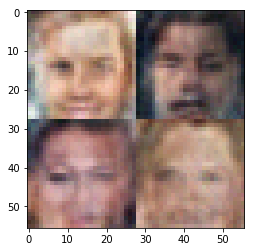

Epoch 1/1... Batch 1521/3165... Discriminator Loss: 0.4953... Generator Loss: 3.3372
Epoch 1/1... Batch 1541/3165... Discriminator Loss: 0.2168... Generator Loss: 2.6745
Epoch 1/1... Batch 1561/3165... Discriminator Loss: 0.9928... Generator Loss: 0.6276
Epoch 1/1... Batch 1581/3165... Discriminator Loss: 0.2435... Generator Loss: 2.5525
Epoch 1/1... Batch 1601/3165... Discriminator Loss: 0.2666... Generator Loss: 4.6682
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


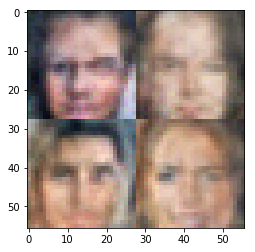

Epoch 1/1... Batch 1621/3165... Discriminator Loss: 0.2597... Generator Loss: 2.7752
Epoch 1/1... Batch 1641/3165... Discriminator Loss: 0.1471... Generator Loss: 5.3442
Epoch 1/1... Batch 1661/3165... Discriminator Loss: 0.7635... Generator Loss: 0.8493
Epoch 1/1... Batch 1681/3165... Discriminator Loss: 0.9772... Generator Loss: 4.2609
Epoch 1/1... Batch 1701/3165... Discriminator Loss: 0.2539... Generator Loss: 2.2976
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


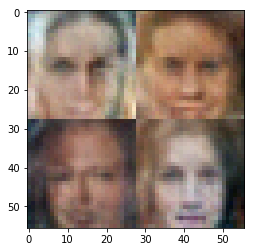

Epoch 1/1... Batch 1721/3165... Discriminator Loss: 0.5372... Generator Loss: 1.5227
Epoch 1/1... Batch 1741/3165... Discriminator Loss: 0.5626... Generator Loss: 3.5581
Epoch 1/1... Batch 1761/3165... Discriminator Loss: 1.0112... Generator Loss: 0.6504
Epoch 1/1... Batch 1781/3165... Discriminator Loss: 0.3347... Generator Loss: 2.0197
Epoch 1/1... Batch 1801/3165... Discriminator Loss: 0.2356... Generator Loss: 3.3038
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


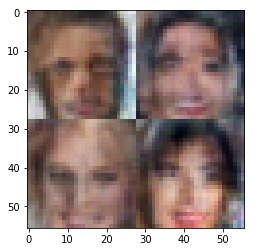

Epoch 1/1... Batch 1821/3165... Discriminator Loss: 0.2300... Generator Loss: 7.8660
Epoch 1/1... Batch 1841/3165... Discriminator Loss: 0.2944... Generator Loss: 2.5416
Epoch 1/1... Batch 1861/3165... Discriminator Loss: 0.2641... Generator Loss: 2.1754
Epoch 1/1... Batch 1881/3165... Discriminator Loss: 0.2670... Generator Loss: 4.9835
Epoch 1/1... Batch 1901/3165... Discriminator Loss: 0.8061... Generator Loss: 0.8712
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


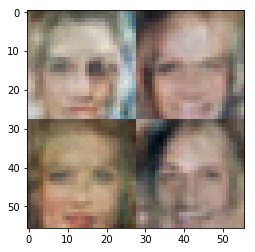

Epoch 1/1... Batch 1921/3165... Discriminator Loss: 0.3214... Generator Loss: 6.3950
Epoch 1/1... Batch 1941/3165... Discriminator Loss: 0.3467... Generator Loss: 2.0299
Epoch 1/1... Batch 1961/3165... Discriminator Loss: 0.3574... Generator Loss: 6.5693
Epoch 1/1... Batch 1981/3165... Discriminator Loss: 0.2357... Generator Loss: 2.2694
Epoch 1/1... Batch 2001/3165... Discriminator Loss: 1.7696... Generator Loss: 0.2406
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


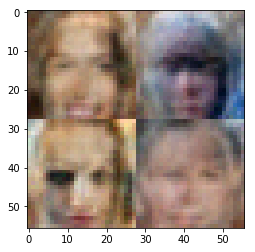

Epoch 1/1... Batch 2021/3165... Discriminator Loss: 0.2211... Generator Loss: 2.6390
Epoch 1/1... Batch 2041/3165... Discriminator Loss: 0.6332... Generator Loss: 1.1169
Epoch 1/1... Batch 2061/3165... Discriminator Loss: 0.1896... Generator Loss: 2.5110
Epoch 1/1... Batch 2081/3165... Discriminator Loss: 2.0989... Generator Loss: 0.2040
Epoch 1/1... Batch 2101/3165... Discriminator Loss: 0.9229... Generator Loss: 0.8195
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


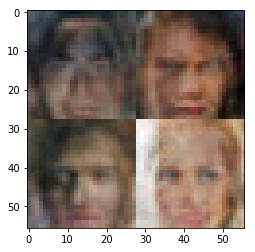

Epoch 1/1... Batch 2121/3165... Discriminator Loss: 0.5266... Generator Loss: 2.0139
Epoch 1/1... Batch 2141/3165... Discriminator Loss: 0.0823... Generator Loss: 5.5988
Epoch 1/1... Batch 2161/3165... Discriminator Loss: 1.2137... Generator Loss: 0.6203
Epoch 1/1... Batch 2181/3165... Discriminator Loss: 0.2534... Generator Loss: 4.9641
Epoch 1/1... Batch 2201/3165... Discriminator Loss: 0.4617... Generator Loss: 1.6568
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


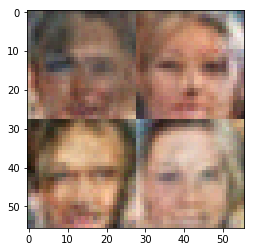

Epoch 1/1... Batch 2221/3165... Discriminator Loss: 0.1381... Generator Loss: 6.2750
Epoch 1/1... Batch 2241/3165... Discriminator Loss: 0.1542... Generator Loss: 4.3646
Epoch 1/1... Batch 2261/3165... Discriminator Loss: 0.2898... Generator Loss: 8.2319
Epoch 1/1... Batch 2281/3165... Discriminator Loss: 0.6364... Generator Loss: 1.0561
Epoch 1/1... Batch 2301/3165... Discriminator Loss: 0.5178... Generator Loss: 1.6033
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


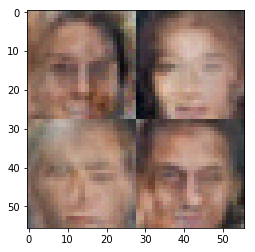

Epoch 1/1... Batch 2321/3165... Discriminator Loss: 0.6470... Generator Loss: 1.3451
Epoch 1/1... Batch 2341/3165... Discriminator Loss: 1.2251... Generator Loss: 5.2009
Epoch 1/1... Batch 2361/3165... Discriminator Loss: 0.1159... Generator Loss: 4.3766
Epoch 1/1... Batch 2381/3165... Discriminator Loss: 0.0899... Generator Loss: 5.4263
Epoch 1/1... Batch 2401/3165... Discriminator Loss: 0.2047... Generator Loss: 5.0897
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


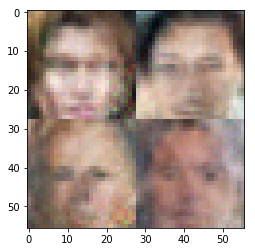

Epoch 1/1... Batch 2421/3165... Discriminator Loss: 0.1236... Generator Loss: 4.2784
Epoch 1/1... Batch 2441/3165... Discriminator Loss: 0.4060... Generator Loss: 1.3806
Epoch 1/1... Batch 2461/3165... Discriminator Loss: 0.0609... Generator Loss: 7.5796
Epoch 1/1... Batch 2481/3165... Discriminator Loss: 0.0889... Generator Loss: 4.6440
Epoch 1/1... Batch 2501/3165... Discriminator Loss: 0.1024... Generator Loss: 4.7036
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


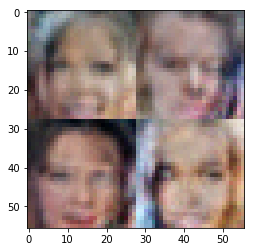

Epoch 1/1... Batch 2521/3165... Discriminator Loss: 0.0759... Generator Loss: 4.2935
Epoch 1/1... Batch 2541/3165... Discriminator Loss: 0.1642... Generator Loss: 8.1835
Epoch 1/1... Batch 2561/3165... Discriminator Loss: 0.1009... Generator Loss: 6.2844
Epoch 1/1... Batch 2581/3165... Discriminator Loss: 0.3091... Generator Loss: 4.4768
Epoch 1/1... Batch 2601/3165... Discriminator Loss: 0.1416... Generator Loss: 4.1445
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


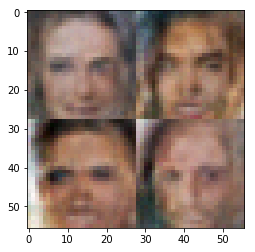

Epoch 1/1... Batch 2621/3165... Discriminator Loss: 0.1108... Generator Loss: 6.5854
Epoch 1/1... Batch 2641/3165... Discriminator Loss: 0.1906... Generator Loss: 4.0558
Epoch 1/1... Batch 2661/3165... Discriminator Loss: 0.1248... Generator Loss: 3.9139
Epoch 1/1... Batch 2681/3165... Discriminator Loss: 0.1105... Generator Loss: 7.1976
Epoch 1/1... Batch 2701/3165... Discriminator Loss: 0.0448... Generator Loss: 5.1538
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


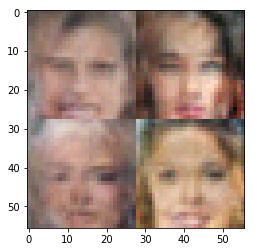

Epoch 1/1... Batch 2721/3165... Discriminator Loss: 0.0918... Generator Loss: 8.9554
Epoch 1/1... Batch 2741/3165... Discriminator Loss: 0.0479... Generator Loss: 7.4015
Epoch 1/1... Batch 2761/3165... Discriminator Loss: 0.3022... Generator Loss: 1.8111
Epoch 1/1... Batch 2781/3165... Discriminator Loss: 0.2152... Generator Loss: 2.3451
Epoch 1/1... Batch 2801/3165... Discriminator Loss: 1.4099... Generator Loss: 0.3559
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


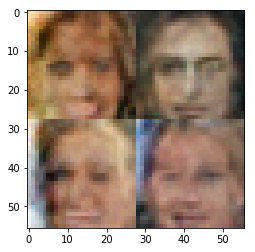

Epoch 1/1... Batch 2821/3165... Discriminator Loss: 0.1638... Generator Loss: 8.7885
Epoch 1/1... Batch 2841/3165... Discriminator Loss: 0.6766... Generator Loss: 1.1495
Epoch 1/1... Batch 2861/3165... Discriminator Loss: 0.6757... Generator Loss: 0.9474
Epoch 1/1... Batch 2881/3165... Discriminator Loss: 0.1328... Generator Loss: 8.1564
Epoch 1/1... Batch 2901/3165... Discriminator Loss: 0.3096... Generator Loss: 6.7038
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


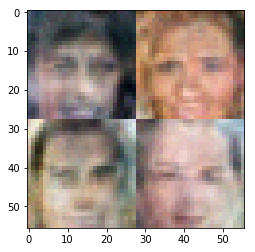

Epoch 1/1... Batch 2921/3165... Discriminator Loss: 0.0411... Generator Loss: 8.6833
Epoch 1/1... Batch 2941/3165... Discriminator Loss: 0.0800... Generator Loss: 4.9850
Epoch 1/1... Batch 2961/3165... Discriminator Loss: 0.0554... Generator Loss: 5.3409
Epoch 1/1... Batch 2981/3165... Discriminator Loss: 0.5897... Generator Loss: 1.2257
Epoch 1/1... Batch 3001/3165... Discriminator Loss: 0.1154... Generator Loss: 5.5562
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


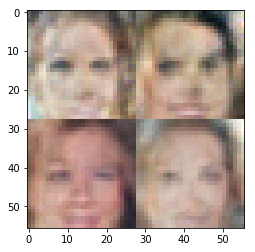

Epoch 1/1... Batch 3021/3165... Discriminator Loss: 0.0688... Generator Loss: 5.2869
Epoch 1/1... Batch 3041/3165... Discriminator Loss: 0.2991... Generator Loss: 8.6850
Epoch 1/1... Batch 3061/3165... Discriminator Loss: 0.2853... Generator Loss: 2.2376
Epoch 1/1... Batch 3081/3165... Discriminator Loss: 0.9823... Generator Loss: 1.1335
Epoch 1/1... Batch 3101/3165... Discriminator Loss: 0.1793... Generator Loss: 6.2955
G_x1.shape: (?, 7, 7, 128)
G_x2.shape: (?, 14, 14, 64)
G_out.shape: (?, 28, 28, 3)


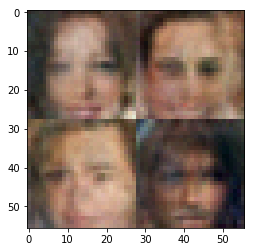

Epoch 1/1... Batch 3121/3165... Discriminator Loss: 0.0867... Generator Loss: 9.9801
Epoch 1/1... Batch 3141/3165... Discriminator Loss: 0.2304... Generator Loss: 5.6685
Epoch 1/1... Batch 3161/3165... Discriminator Loss: 0.0565... Generator Loss: 4.6075


In [101]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.